# pc-gym Quick Start Guide

Example of implementing a RL policy to a CSTR


## Libraries

In [1]:
from dataclasses import dataclass
import numpy as np 
import torch
import matplotlib.pyplot as plt 
import gymnasium as gym
import torch.nn.functional as F
import copy
from stable_baselines3 import PPO,SAC
from pcgym import make_env
import jax.numpy as jnp
#Global params
T = 26
nsteps = 100

# CSTR 

The CSTR performs the reaction A -> B. The model has states: Ca and T which are the concentration of species A and the temperature in the reactor, and controls: Tc which is the temperature of the cooling jacket.

First, we define an environment with a dictionary:

In [5]:
# Setpoint
SP = {'Ca': [0.85 for i in range(int(nsteps/2))] + [0.9 for i in range(int(nsteps/2))]} 

# Action and Observation Space
action_space = {'low': np.array([295]), 'high': np.array([302])}
observation_space = {'low': np.array([0.7,300,0.8]),'high': np.array([1,350,0.9])}

# Construct the environment parameter dictionary
env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP' :SP, 
    'o_space' : observation_space, 
    'a_space' : action_space, 
    'x0': np.array([0.8,330,0.8]), # Initial conditions [Ca, T, Ca_SP]
    'model': 'cstr_ode', # Select the model
}

# Create environment
env = make_env(env_params)


Load a pretrained SAC agent.

In [8]:
# Load a pre-trained policy
initial_policy = SAC.load('SAC_cstr.zip')

Plot a rollout with a comparison to the an oracle (MPC with perfect model) controller.


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



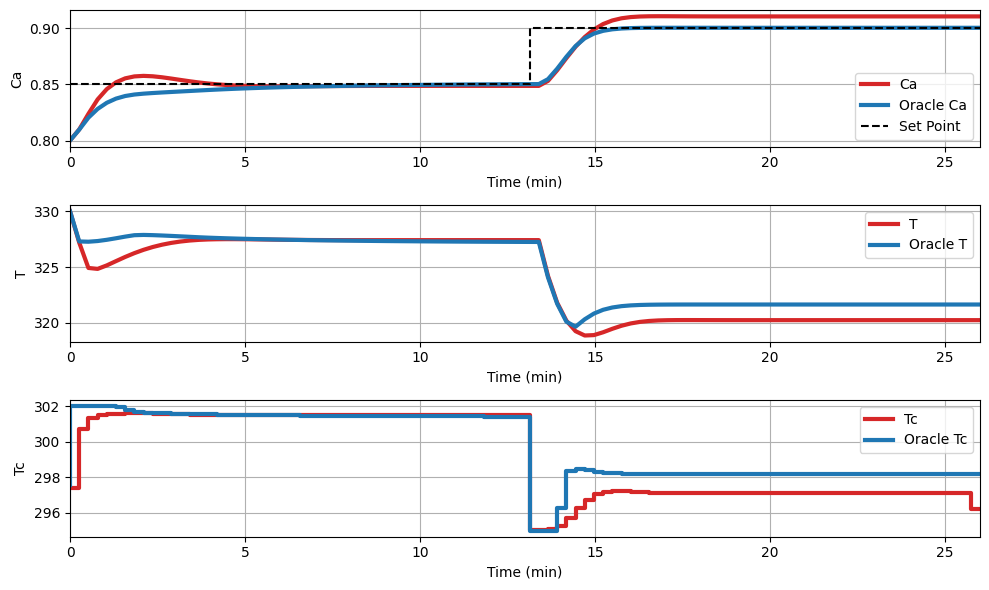

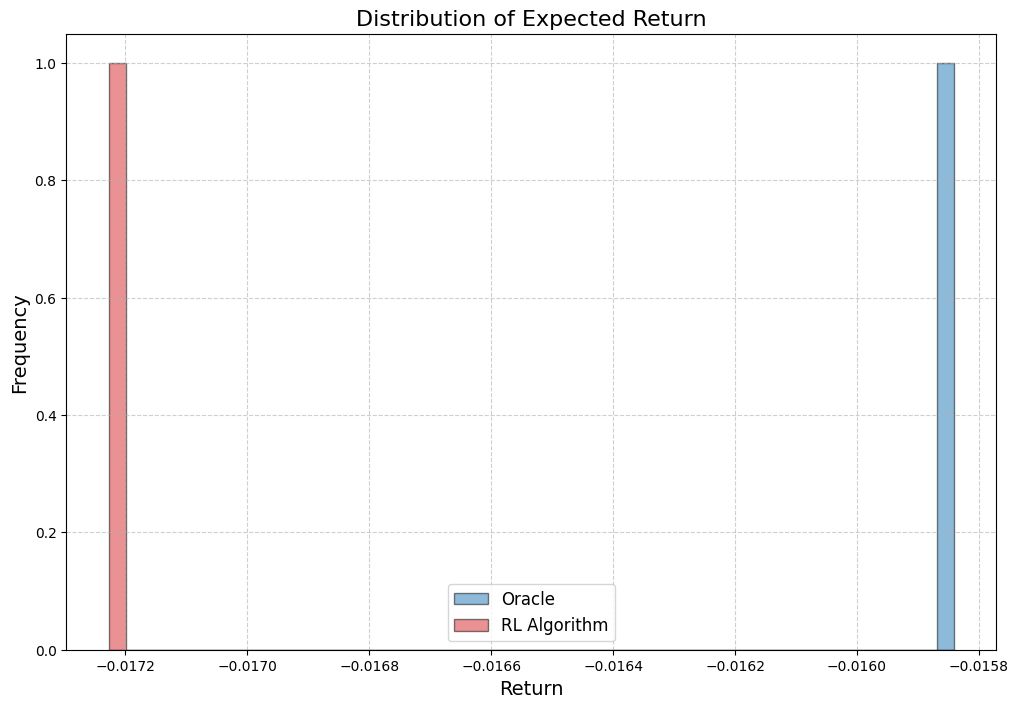

In [9]:
# Plot a rollout with a oracle and a reward distribution
env.plot_rollout(initial_policy, reps= 1, oracle = True, dist_reward=True, MPC_params={'N': 10, 'R': 0.001})